# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os

In [3]:
# let's read images with mask & without mask
mask_img0 = Image.open("E:/analytics/projects/Face_Mask_Recognition/Face_Mask/train/with_mask/8-with-mask.jpg")
mask_img1 = Image.open("E:/analytics/projects/Face_Mask_Recognition/Face_Mask/train/with_mask/10-with-mask.jpg")
without_mask_img0 = Image.open("E:/analytics/projects/Face_Mask_Recognition/Face_Mask/train/without_mask/33.jpg")

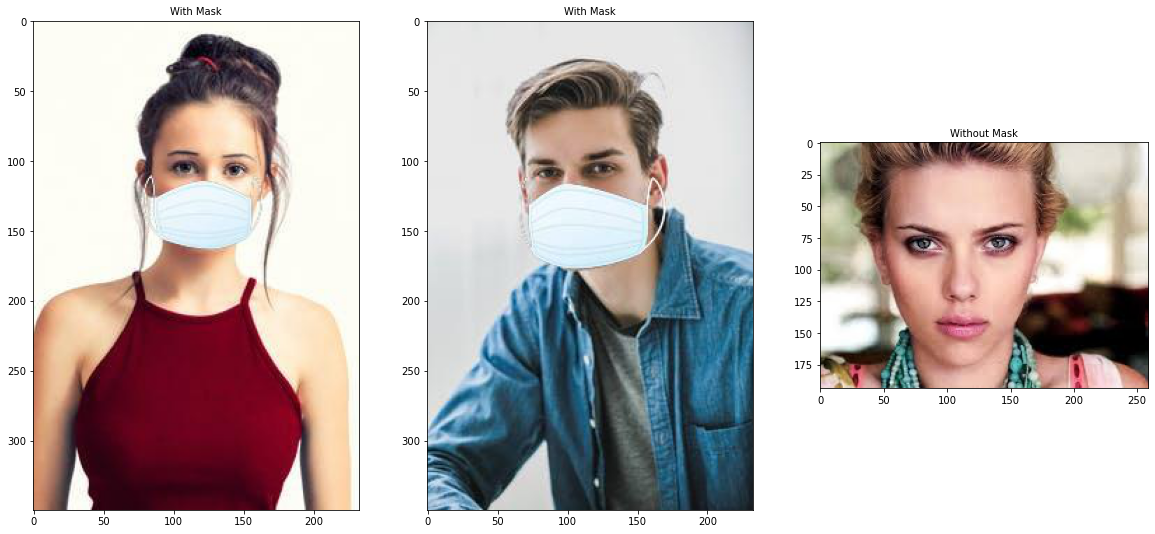

In [4]:
fig = plt.figure(figsize=(20,9))

# Add subplotting to display multiple images
a1 = fig.add_subplot(1,3,1)  # 1 row, 3 column, 1st image
img_plot = plt.imshow(mask_img0)
a1.set_title("With Mask", fontsize=10)

# Add subplotting to display multiple images
a1 = fig.add_subplot(1,3,2)  # 1 row, 3 column, 2nd image
img_plot = plt.imshow(mask_img1)
a1.set_title("With Mask", fontsize=10)

# Add subplotting to display multiple images
a1 = fig.add_subplot(1,3,3)  # 1 row, 3 column, 3rd image
img_plot = plt.imshow(without_mask_img0)
a1.set_title("Without Mask", fontsize=10)
plt.show()

# Image Data Augmentation

- All RGB Image data will be used to create new samples for Training.
- New samples will be transformed using Image data Generator.
- Images will be resampled using pixel normalization (Divide each pixel value by 255), shear range, zoom, brightness, etc.

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from numpy import expand_dims

In [6]:
img = load_img("E:/analytics/projects/Face_Mask_Recognition/Face_Mask/train/with_mask/10-with-mask.jpg")

In [7]:
# Convert img data into array
data = img_to_array(img)
print(data.shape)
# axis = 0, rowwise , axis = 1 (columnwise)
samples = expand_dims(data, axis = 0)

(350, 233, 3)


In [8]:
# (1, 350, 233, 3) = Num of images, shape of image = (350, 233, 3)
print(samples.shape)

(1, 350, 233, 3)


## Transformation of Images

### Rotation of Image

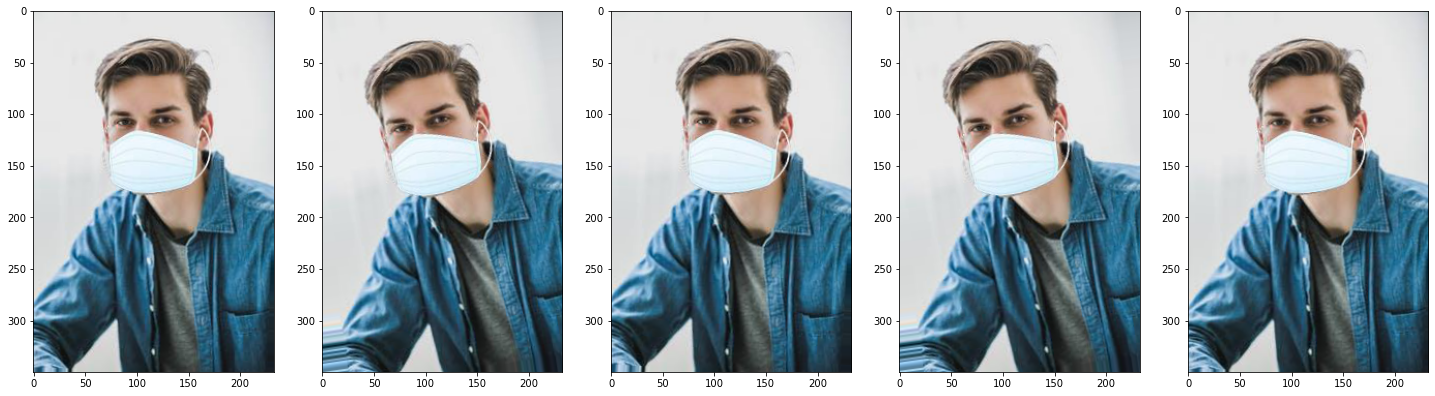

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
datagen = ImageDataGenerator(rotation_range= 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig , ax = plt.subplots(1, 5, figsize = (25,10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

### Horizontal Flip of Image

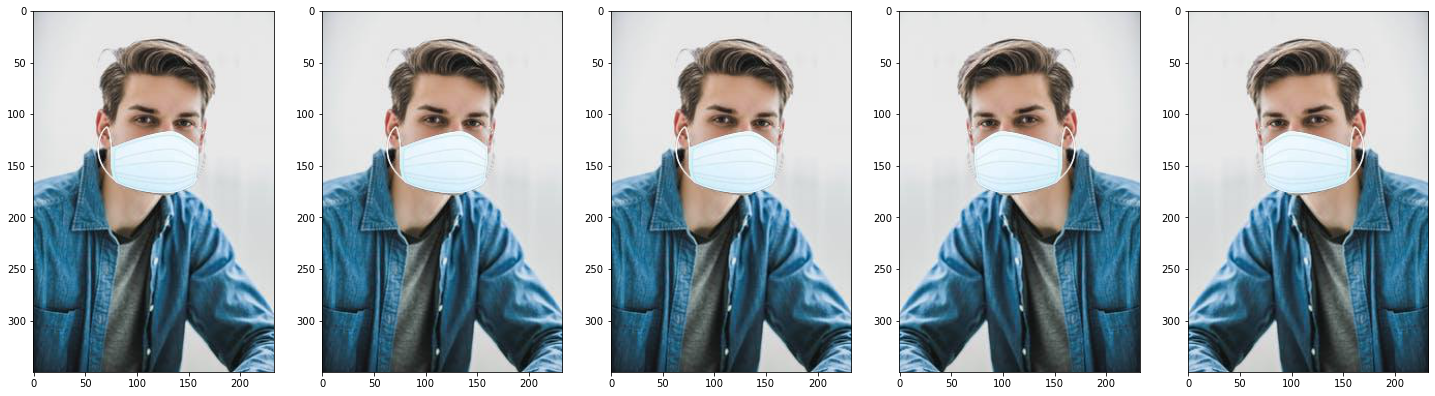

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
datagen = ImageDataGenerator(horizontal_flip=True, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig , ax = plt.subplots(1, 5, figsize = (25,10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

### Zoom Range Transformation of Image

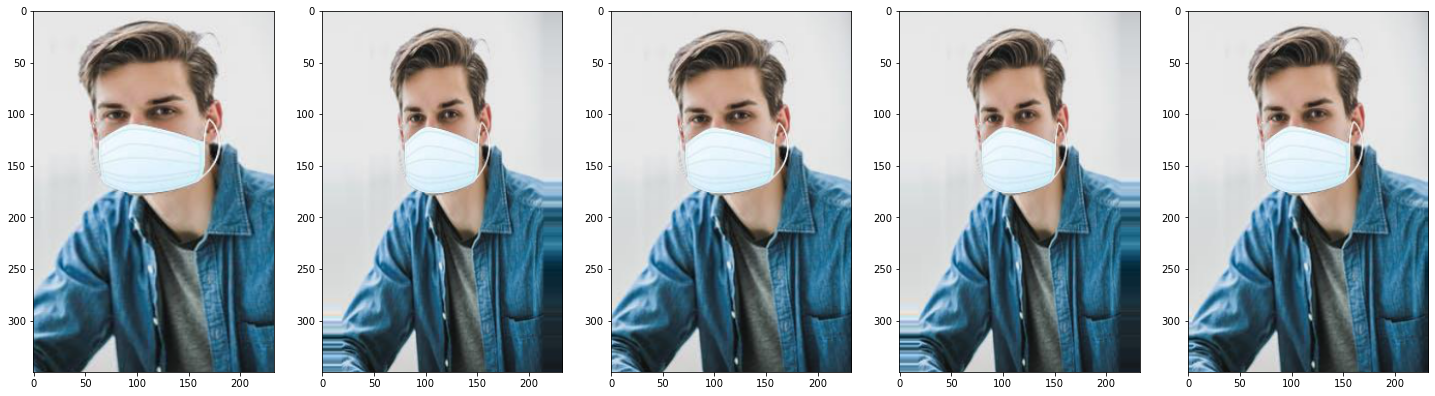

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
# Zoom = 0.2 = 20%
datagen = ImageDataGenerator(zoom_range= 0.2, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig , ax = plt.subplots(1, 5, figsize = (25,10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

### Shear Range Transformation of Image

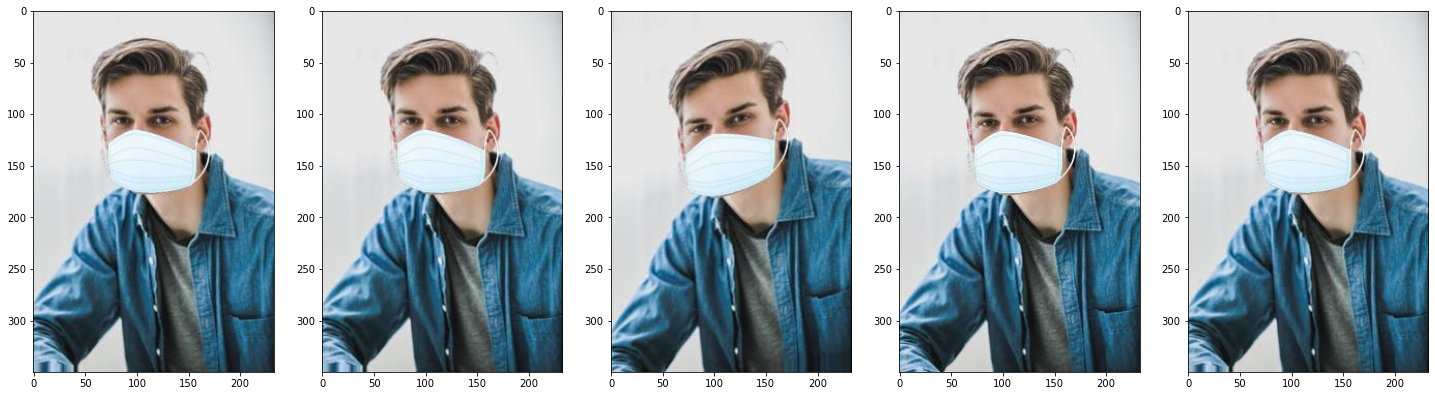

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
# Shear Range Transformation of Image Data
datagen = ImageDataGenerator(shear_range = 10, fill_mode='nearest')
IDG = datagen.flow(samples, batch_size = 1)
fig , ax = plt.subplots(1, 5, figsize = (25,10))
for i in range(5):
    fig = plt.figure()
    batch = IDG.next()
    image1 = batch[0].astype('uint8')
    ax[i].imshow(image1)
plt.show()

# Importing Folder containing Images

## Image Pixel Normalization

In [13]:
# Image Transformation , Image Pixel Normalization (0,1)
train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=10, zoom_range=0.2, shear_range=5, horizontal_flip=True, 
                                   fill_mode='nearest')

# Test Data Generator
test_datagen = ImageDataGenerator(rescale= 1./255)

## Importing Image Folder

In [14]:
# new image shape = (150,150), batch size = 16
# alternative class_mode = "categorical" for multiclass classification
training_set = train_datagen.flow_from_directory('E:/analytics/projects/Face_Mask_Recognition/Face_Mask/train/', target_size=(150,150), batch_size=16,
                                                class_mode='binary')

test_set = train_datagen.flow_from_directory('E:/analytics/projects/Face_Mask_Recognition/Face_Mask/test/', target_size=(150,150), batch_size=16,
                                                class_mode='binary')

Found 1314 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [15]:
training_set.image_shape

(150, 150, 3)

In [16]:
test_set.image_shape

(150, 150, 3)

# CNN Model

In [17]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential  # It develops feedforward neural network
from tensorflow.keras.optimizers import Adam

In [18]:
def build_model():
    # Model is Feedforward Neural Network
    model = Sequential()
    
    # filters = similar to number of neurons, kernel shape = (3,3), strides = (1,1), padding = 'same' (it means zero padding)
    
    # Conv Layer - I
    model.add(Conv2D(filters = 64, kernel_size =(3,3), padding = 'same', activation = 'relu', 
                    input_shape = (150, 150, 3)))
    model.add(MaxPooling2D())
    
    # Conv Layer - II
    model.add(Conv2D(filters = 64, kernel_size =(3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D())
    
    # Conv Layer - III
    model.add(Conv2D(filters = 64, kernel_size =(3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D())
    
    # Flatten Layer
    model.add(Flatten())
    
    # Full Connected Layer
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))  # Using sigmoid bcz it has only two possible output, mask or without mask. For multiclass classification, we use SOFTMAX
    
    # Optimizers (0.00001 - 0.5) - learning rate (alpha) 
    adam_optimizer = Adam(learning_rate= 0.0001)
    
    # Loss = "binary_crossentropy" , classification's metric = accuracy
    model.compile(optimizer = adam_optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])  # As output is mask or without mask, and also we used sigmoid, hence we are using here is binary_crossentropy. For multiclass, we will use categorical_crossentropy
    
    return model

In [19]:
model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Making Checkpoint

In [20]:
from tensorflow.keras import callbacks
filepath = 'E:/analytics/projects/Face_Mask_Recognition/Mask_BestModel.hdf5'

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode = 'min', verbose = 1)
checkpoint

## Model Fitting

In [36]:
# epochs = number of iterations
# validation data = a small amount of training sample or test samples used to validate model performance at end of each epoch
# batch size = number of samples per each epoch steps
history = model.fit_generator(generator = training_set, validation_data= test_set, epochs=30, shuffle=True, 
                              callbacks=[checkpoint], verbose = 1)

C:\Users\Anuj\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
83/83 [==============================] - 48s 568ms/step - loss: 0.4348 - accuracy: 0.8021 - val_loss: 0.1821 - val_accuracy: 0.9381

Epoch 00001: val_loss improved from inf to 0.18213, saving model to E:/DL and CV IITH/Day 9\Mask_BestModel.hdf5
Epoch 2/30
83/83 [==============================] - 42s 506ms/step - loss: 0.1701 - accuracy: 0.9422 - val_loss: 0.1492 - val_accuracy: 0.9433

Epoch 00002: val_loss improved from 0.18213 to 0.14923, saving model to E:/DL and CV IITH/Day 9\Mask_BestModel.hdf5
Epoch 3/30
83/83 [==============================] - 40s 480ms/step - loss: 0.1320 - accuracy: 0.9559 - val_loss: 0.1189 - val_accuracy: 0.9485

Epoch 00003: val_loss improved from 0.14923 to 0.11894, saving model to E:/DL and CV IITH/Day 9\Mask_BestModel.hdf5
Epoch 4/30
83/83 [==============================] - 40s 482ms/step - loss: 0.1106 - accuracy: 0.9680 - val_loss: 0.1126 - val_accuracy: 0.9639

Epoch 00004: val_loss improved from 0.11894 to 0.11259, saving model to E:/DL an

In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.434847,0.802131,0.182133,0.938144
1,0.170100,0.942161,0.149229,0.943299
2,0.131976,0.955860,0.118936,0.948454
3,0.110565,0.968037,0.112593,0.963918
4,0.093668,0.966514,0.098980,0.969072
5,0.086228,0.966514,0.100711,0.969072
6,0.084872,0.973364,0.094247,0.963918
7,0.069588,0.978691,0.124596,0.974227
8,0.072183,0.976408,0.110189,0.948454
9,0.057568,0.980974,0.072347,0.984536


<AxesSubplot:>

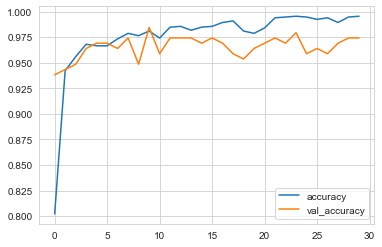

In [38]:
import seaborn as sns
sns.set_style('whitegrid')
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

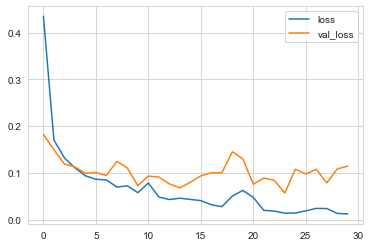

In [39]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

- Graph of accuracy and val_accuracy or loos and val_loss is almost near to each other so it's good to go ahead

# How to use saved Best Model

In [21]:
model.load_weights('E:/analytics/projects/Face_Mask_Recognition/Mask_BestModel.hdf5')

In [22]:
predictions = model.predict(test_set)
yhat = np.round(predictions)

model.evaluate(test_set)

13/13 [==============================] - 2s 160ms/step - loss: 0.0798 - accuracy: 0.9742


[0.07982327789068222, 0.9742268323898315]

In [23]:
test_set.class_indices

{'with_mask': 0, 'without_mask': 1}

# WebCam Face Mask Recognition

- Press 'q' to exit webcam window

In [24]:
from tensorflow.keras.preprocessing import image
model.load_weights('E:/analytics/projects/Face_Mask_Recognition/Mask_BestModel.hdf5')

color_dict = {0:(0,255,0), 1:(0,0,255)}

cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('E:/analytics/projects/Face_Mask_Recognition/haarcascade_frontalface_default.xml')
while cap.isOpened():
    _,img = cap.read()
    face=face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg', face_img)
        # Transform test image from video to training set shape = (150,150,3)
        test_image = image.load_img('temp.jpg', target_size=(150,150,3))
        # convert img data into array 
        test_image = image.img_to_array(test_image)
        # axis = 0, rowwise , axis = 1 (columnwise)
        test_image = np.expand_dims(test_image, axis = 0)
        # make prediction
        pred = model.predict(test_image)[0][0]
        print(pred)
        if pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'NO MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[pred],2)
            cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[pred],-1)
            cv2.putText(img,'MASK',(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2)
    
    cv2.imshow('img', img)
    
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


- That's it, I have successfully developed a CNN Model for Face Recognition. It will show good performance/accuracy for surgical mask.
- Thank You for reading.